In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [126]:
prec = pd.read_csv('data/region_prec_years.csv')
temp = pd.read_csv('data/region_temp_years.csv')
df = pd.read_excel('data/SHDI-SGDI-Total 5.0 2022-05-25.xlsx', keep_default_na=False)
count_cont = pd.read_csv('data/Countries-Continents.csv')
df["pop"] = df["pop"].replace(' ',np.nan)
df["pop"] = df["pop"].astype(float)

indicator = {
#"sgdi":       "Subnational Gender Development Index",Ivory Coast
"shdi":       "Subnational Human Development Index",
"healthindex":"Health Index",
"incindex":   "Income Index",
"edindex":    "Education Index",
"esch":       "Expected years of schooling of children aged 6",
"msch":       "Mean years of schooling of the adult population (25+)",
"lifexp":     "Life expectancy at birth",
"gnic":       "Gross National Income per capita in 2011 US$ PPP",
"lgnic":      "Log (natural) of Gross National Income per capita in 2011 US$ PPP",
"pop":        "Population"
}

In [127]:
# merge climate data and indicator 
df = df.merge(prec, how="left", left_on=['year','GDLCODE'], right_on=['year', 'GDLcode'] ).drop(columns='GDLcode')
df = df.merge(temp, how="left", left_on=['year','GDLCODE'], right_on=['year', 'GDLcode']  ).drop(columns='GDLcode')
df = df.merge(count_cont, how="left", left_on=["country"], right_on=["Country"]).drop(columns="Country")

In [133]:
year1 = 2000
year2 = 2016
soc_data = "esch"
climate_data = 'temperature_trend'

df_country = df.loc[df.level=='National'].drop_duplicates(subset=['Continent','country','year'])
df_country_pivot = df_country.pivot(index=['Continent','country'], columns='year', values=[soc_data, climate_data])
df_country_pivot.columns = [f'{i[0]}_{i[1]}' for i in df_country_pivot.columns]
df_country_pivot = df_country_pivot.reset_index()
df_country_pivot = df_country_pivot.merge(colors, how='left', on='Continent')


In [131]:
df_country.groupby(['Continent','country', 'year']).size().sort_values(ascending=False)

Continent      country     year
Europe         Iceland     2005    2
Asia           Oman        2016    2
Europe         Iceland     2014    2
Asia           Oman        2012    2
Europe         Luxembourg  1994    1
                                  ..
Asia           Iran        2002    1
                           2001    1
                           2000    1
                           1999    1
South America  Venezuela   2019    1
Length: 5062, dtype: int64

In [132]:
df_country.loc[(df_country.country=="Iceland") & (df_country.year==2005)]

,iso_code,country,year,GDLCODE,level,region,continent,sgdi,shdi,healthindex,...,msch,lifexp,gnic,lgnic,pop,precipitation_trend,area_x,temperature_trend,area_y,Continent
26446,ISL,Iceland,2005,ISLt,National,Total,Europe,0.985,0.896,0.94,...,10.0,81.1,43521.0,10.681,296.734,0.734368,96686.850317,-0.276578,96686.850317,Europe
26448,ISL,Iceland,2005,ISLt,National,Total,Europe,0.985,0.896,0.94,...,10.0,81.1,43521.0,10.681,296.734,0.734368,96686.850317,-0.276578,96686.850317,Europe


In [116]:
prec

,GDLcode,year,precipitation_trend,area
0,AFGr101,2000,-0.848874,30506.596534
1,AFGr101,2001,-1.102264,30506.596534
2,AFGr101,2002,-1.138927,30506.596534
3,AFGr101,2003,-1.053668,30506.596534
4,AFGr101,2004,-0.992266,30506.596534
...,...,...,...,...
30085,ZWErt,2012,-1.219027,397384.446568
30086,ZWErt,2013,-1.151023,397384.446568
30087,ZWErt,2014,-0.966772,397384.446568
30088,ZWErt,2015,-1.138071,397384.446568


In [115]:
df.loc[df.level=="National"]

,iso_code,country,year,GDLCODE,level,region,continent,sgdi,shdi,healthindex,...,msch,lifexp,gnic,lgnic,pop,precipitation_trend,area_x,temperature_trend,area_y,Continent
8,AFG,Afghanistan,1990,AFGt,National,Total,Asia/Pacific,,0.302,0.466,...,1.5,50.3,2478.0,7.815,12412.308,NaN,NaN,NaN,NaN,Asia
17,AFG,Afghanistan,1991,AFGt,National,Total,Asia/Pacific,,0.308,0.477,...,1.6,51.0,2060.0,7.630,13299.017,NaN,NaN,NaN,NaN,Asia
26,AFG,Afghanistan,1992,AFGt,National,Total,Asia/Pacific,,0.314,0.486,...,1.6,51.6,1922.0,7.561,14485.546,NaN,NaN,NaN,NaN,Asia
35,AFG,Afghanistan,1993,AFGt,National,Total,Asia/Pacific,,0.312,0.497,...,1.7,52.3,1321.0,7.186,15816.603,NaN,NaN,NaN,NaN,Asia
44,AFG,Afghanistan,1994,AFGt,National,Total,Asia/Pacific,,0.307,0.505,...,1.8,52.8,951.0,6.858,17075.727,NaN,NaN,NaN,NaN,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54623,ZWE,Zimbabwe,2015,ZWEt,National,Total,Africa,0.927,0.552,0.608,...,8.2,59.5,2658.0,7.885,13814.629,NaN,NaN,NaN,NaN,Africa
54634,ZWE,Zimbabwe,2016,ZWEt,National,Total,Africa,0.925,0.558,0.620,...,8.3,60.3,2681.0,7.894,14030.390,NaN,NaN,NaN,NaN,Africa
54645,ZWE,Zimbabwe,2017,ZWEt,National,Total,Africa,0.927,0.563,0.628,...,8.3,60.8,2759.0,7.923,14236.745,NaN,NaN,NaN,NaN,Africa
54656,ZWE,Zimbabwe,2018,ZWEt,National,Total,Africa,0.928,0.570,0.634,...,8.4,61.2,2942.0,7.987,14439.018,NaN,NaN,NaN,NaN,Africa


In [138]:
def plot_dev(soc_data, climate_data, take_mean=True):
    
    year1 = 2000
    year2 = 2016
    #soc_data = "esch"
    #climate_data = 'temperature_trend'

    bright_cols = ['#e59866','#f7dc6f','#82e0aa','#73c6b6','#85c1e9','#bb8fce']#,'#f1948a']
    solid_cols = ['#d35400','#f1c40f','#2ecc71','#16a085','#3498db','#8e44ad']#,'#e74c3c']
    colors = pd.DataFrame.from_dict({
        'Continent': df.Continent.unique(),
        'bright_color': bright_cols,
        'solid_color': solid_cols
    })

    #df_pivot = df.pivot(index=['Continent','GDLCODE'], columns='year', values=[soc_data, climate_data])
    #df_pivot.columns = [f'{i[0]}_{i[1]}' for i in df_pivot.columns]
    #df_pivot = df_pivot.reset_index()
    #df_pivot = df_pivot.merge(colors, how='left', on='Continent')

    if take_mean:
        df_country = df.groupby(['country','Continent', 'year']).mean([soc_data, climate_data]).reset_index()
    else:
        df_country = df.loc[df.level=='National'].drop_duplicates(subset=['Continent','country','year'])
    df_country_pivot = df_country.pivot(index=['Continent','country'], columns='year', values=[soc_data, climate_data])
    df_country_pivot.columns = [f'{i[0]}_{i[1]}' for i in df_country_pivot.columns]
    df_country_pivot = df_country_pivot.reset_index()
    df_country_pivot = df_country_pivot.merge(colors, how='left', on='Continent')


    # development on country level because of too many data points
    import matplotlib.patches as mpatches
    from matplotlib.lines import Line2D
    fig, ax = plt.subplots(figsize=(7,7))
    fig.patch.set_facecolor('xkcd:white')

    for i, row in df_country_pivot.iterrows():
        plt.plot([row[f'{climate_data}_{year1}'], row[f'{climate_data}_{year2}']],
                 [row[f'{soc_data}_{year1}'], row[f'{soc_data}_{year2}']], 
                 color='darkgrey', ms=0, linewidth=1
                )
    plt.scatter(df_country_pivot[f'{climate_data}_{year1}'], df_country_pivot[f'{soc_data}_{year1}'], color=df_country_pivot.solid_color, marker='+', s=55, label=f'{year1} - real')
    plt.scatter(df_country_pivot[f'{climate_data}_{year2}'], df_country_pivot[f'{soc_data}_{year2}'], color=df_country_pivot.solid_color, marker='.', s=55, label=f'{year2} - fake')
    plt.xlabel(f"{climate_data.split('_')[0]} trend", size=12)
    plt.ylabel(soc_data,size=12)
    plt.title(f'Development of {indicator[soc_data]} within the years {year1} and {year2} per country')

    # legend
    legend_labels = []
    for i, row in colors.iterrows():
        legend_labels.append(mpatches.Patch(color=row.solid_color, label=row.Continent))
    legend_labels.extend([
        Line2D([0], [0], marker='+', color='black', lw=0, label=year1),
        Line2D([0], [0], marker='.', color='black', lw=0, label=year2),
    ])
    plt.legend(handles=legend_labels)

    # save figure
    if take_mean:
        fig.savefig(f'figures/development/{climate_data.split("_")[0]}_{soc_data}_mean_national.png', bbox_inches="tight")
    else:
        fig.savefig(f'figures/development/{climate_data.split("_")[0]}_{soc_data}_national.png', bbox_inches="tight")

    

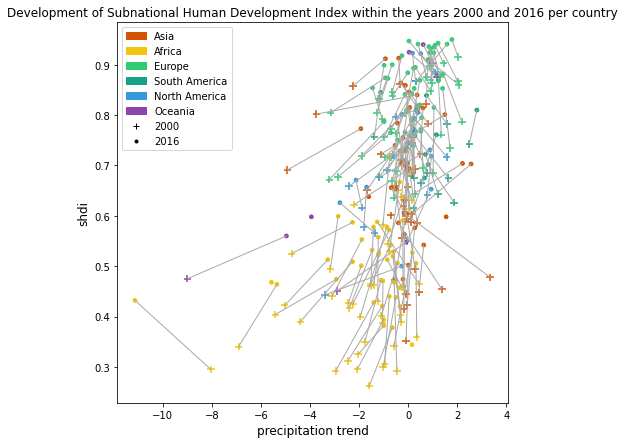

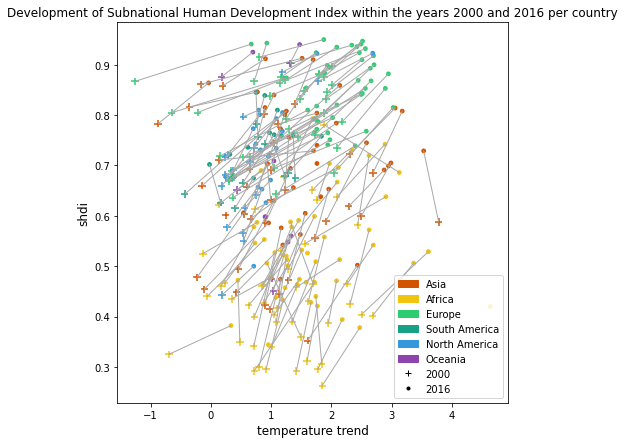

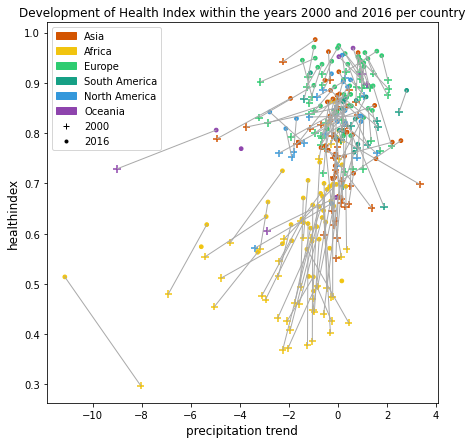

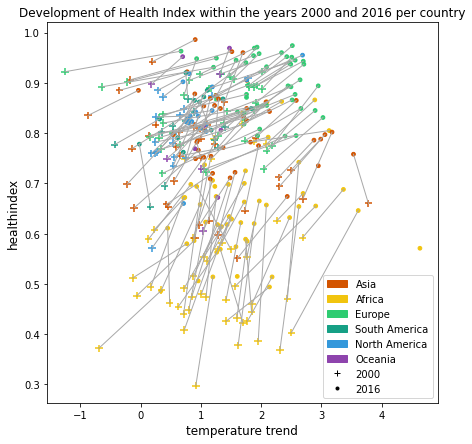

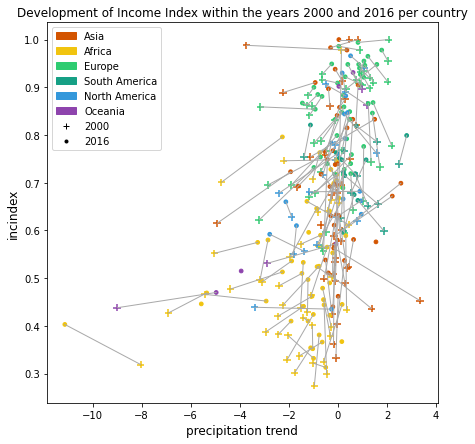

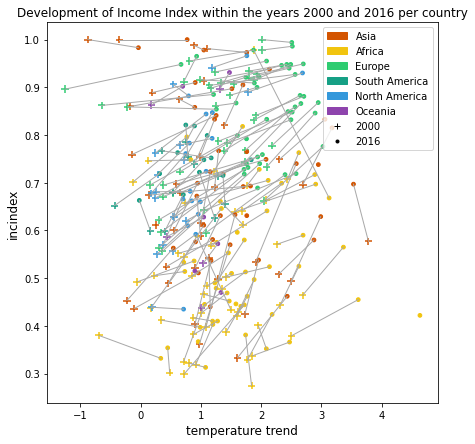

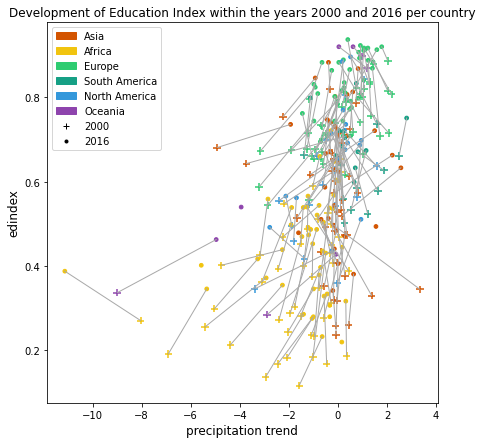

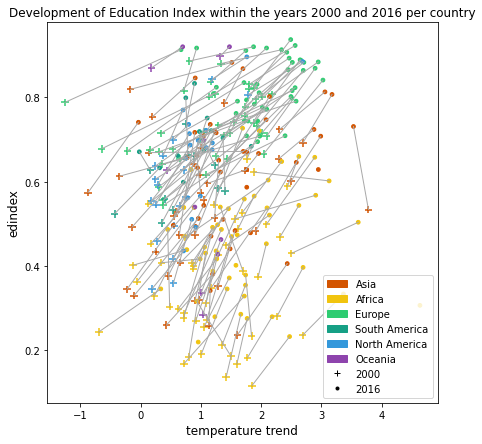

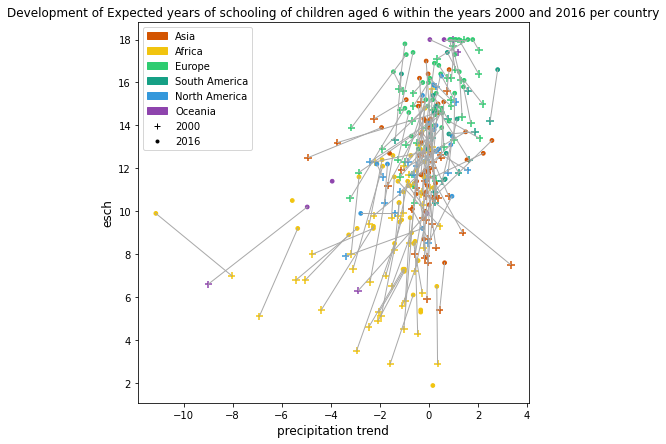

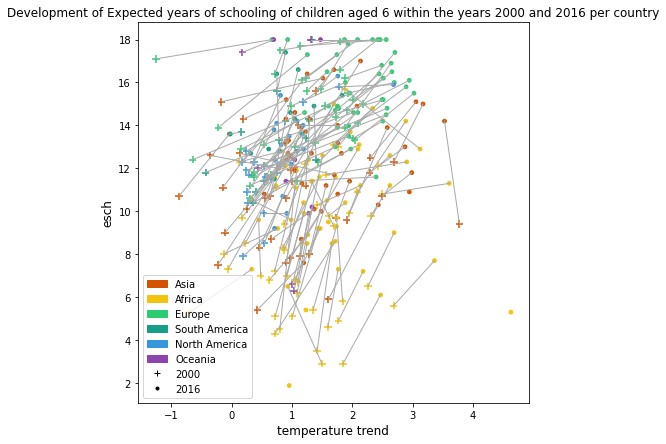

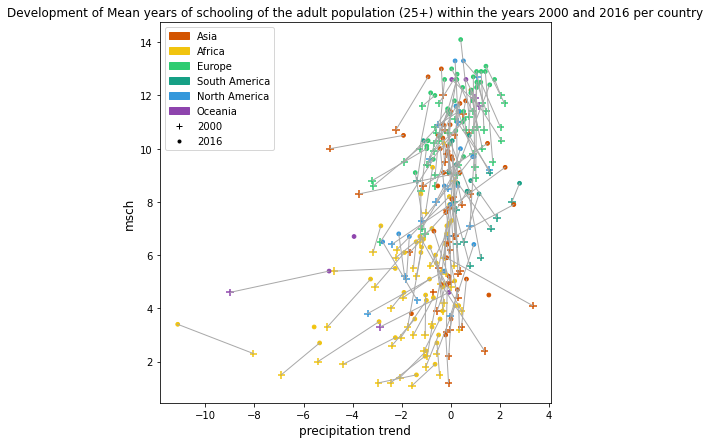

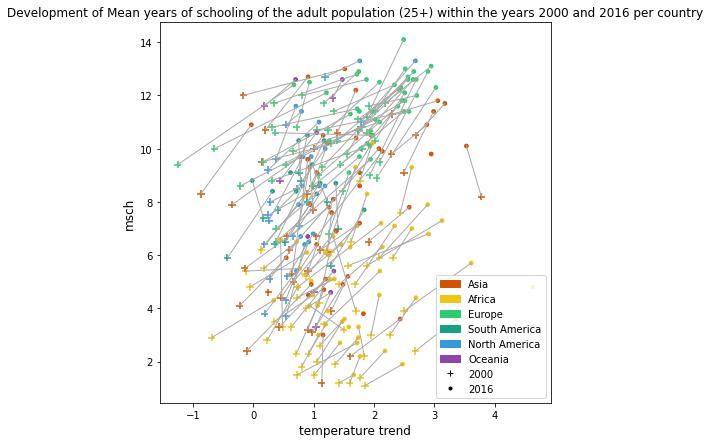

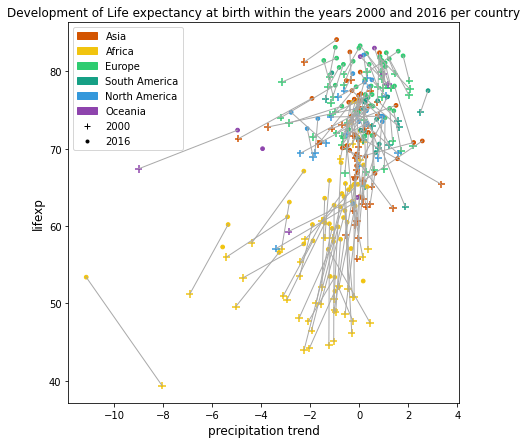

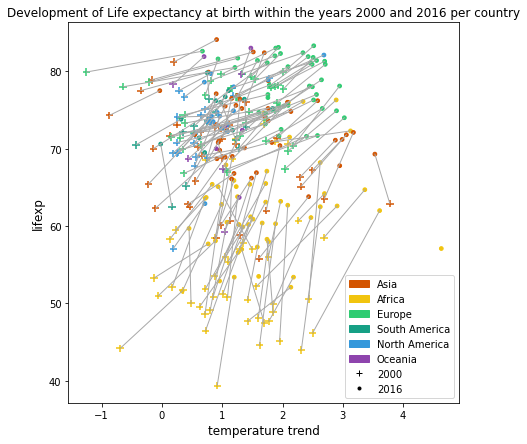

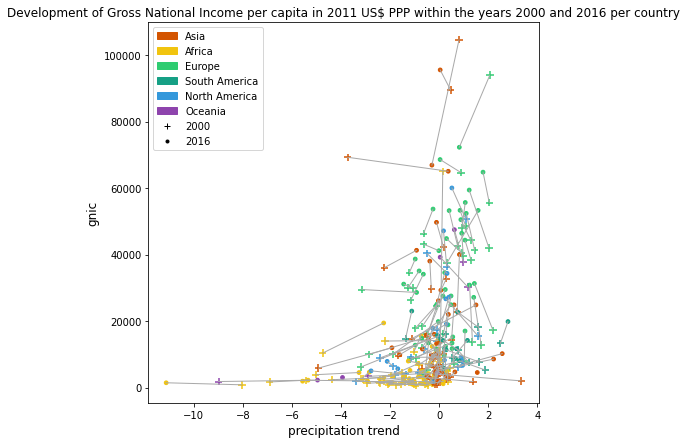

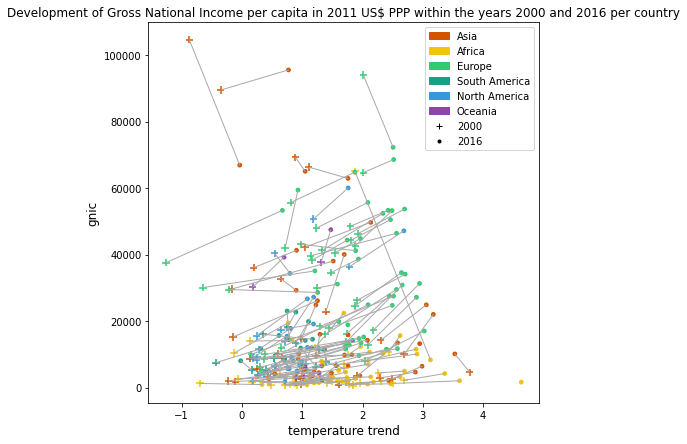

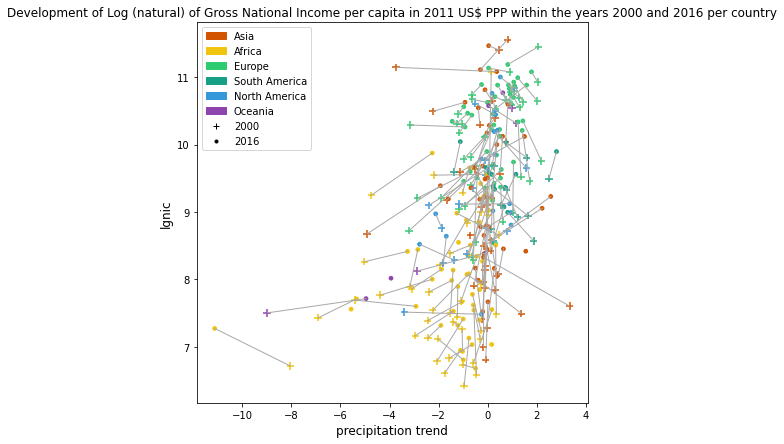

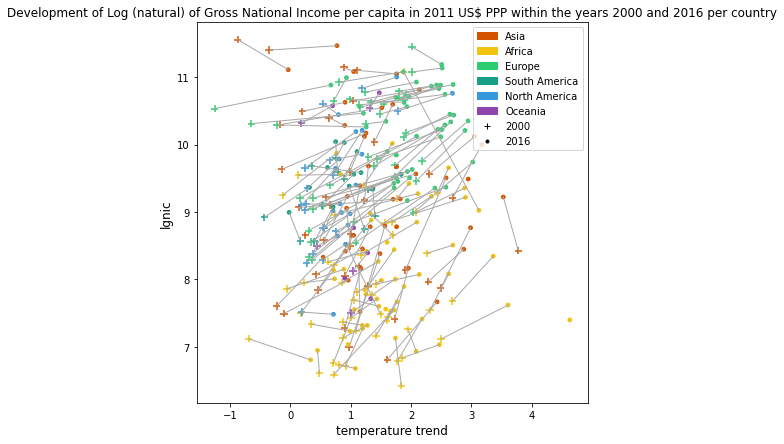

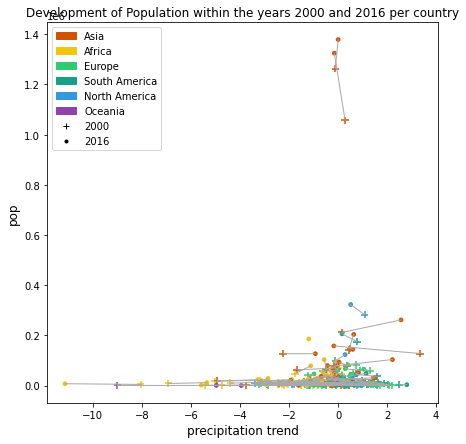

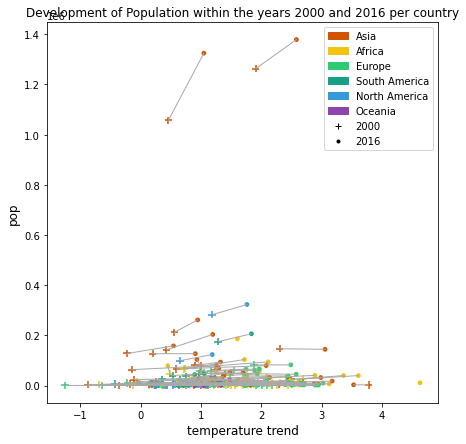

In [139]:
for ind in indicator.keys():
    for climate_dat in ["precipitation_trend", "temperature_trend"]:
        for take_mean in [False]:
            plot_dev(soc_data=ind, climate_data=climate_dat, take_mean=take_mean)

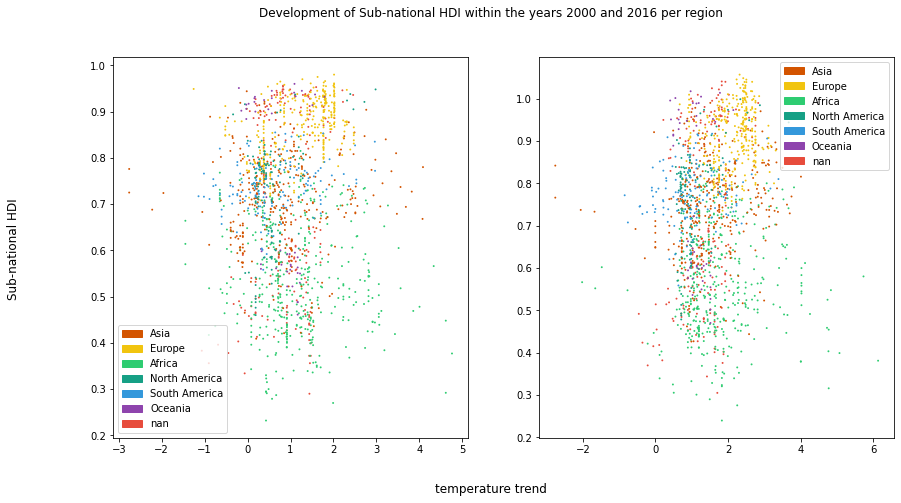

In [225]:
# development on country level because of too many data points
fig, ax = plt.subplots(1, 2, figsize=(14,7))
fig.suptitle(f'Development of {soc_data} within the years {year1} and {year2} per region')
fig.supxlabel(f'{climate_data.split("_")[0]} trend', size=12)
fig.supylabel(soc_data,size=12)

ax[0].scatter(df_pivot[f'{climate_data}_{year1}'], df_pivot[f'{soc_data}_{year1}'], color=df_pivot.solid_color, marker='.', linewidth=0, s=15, label=f'{year1} - real')
legend_labels = []
for i, row in colors.iterrows():
    legend_labels.append(mpatches.Patch(color=row.solid_color, label=row.Continent))
ax[0].legend(handles=legend_labels)

ax[1].scatter(df_pivot[f'{climate_data}_{year2}'], df_pivot[f'{soc_data}_{year2}'], color=df_pivot.solid_color, marker='.', linewidth=0, s=15, label=f'{year2} - fake')
legend_labels = []
for i, row in colors.iterrows():
    legend_labels.append(mpatches.Patch(color=row.solid_color, label=row.Continent))
ax[1].legend(handles=legend_labels)

fig.savefig(f'{climate_data.split("_")[0]}_hdi_two_plots.png')
